

```
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```



In [88]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



```
# Start: 1970-10-01
# End: 2020-09-31

stock_data = pd.read_csv(
    "/content/drive/My Drive/data/stock_data/^GSCP.csv",
    index_col=0,
    parse_dates=True
)

stock_data
```



In [89]:
stock_data = pd.read_csv(
    # "/content/drive/My Drive/data/stock_data/^GSPC.csv",
    # "/content/drive/My Drive/data/stock_data/NTDOY.csv",
    # "/content/drive/My Drive/data/stock_data/SNE.csv",
    # "/content/drive/My Drive/data/stock_data/AAPL.csv",
    # "/content/drive/My Drive/data/stock_data/GOOG.csv",
    # "/content/drive/My Drive/data/stock_data/AMZN.csv",
    "/content/drive/My Drive/data/stock_data/FB.csv",
    index_col = 0,
    parse_dates=True
)

stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-31,132.009995,132.119995,119.250000,120.750000,120.750000,171699500
2016-11-07,122.830002,124.610001,115.269997,119.019997,119.019997,175072500
2016-11-14,119.129997,119.129997,113.550003,117.019997,117.019997,159933400
2016-11-21,118.199997,122.980003,117.800003,120.379997,120.379997,85835300
2016-11-28,120.120003,122.099998,114.000000,115.400002,115.400002,135528600
...,...,...,...,...,...,...
2020-09-28,259.399994,268.329987,254.820007,259.940002,259.940002,95509700
2020-10-05,262.200012,265.690002,254.820007,264.450012,264.450012,85073200
2020-10-12,270.200012,280.179993,263.670013,265.929993,265.929993,96722600




```
stock_data.drop(
    ["Open", "High", "Low", "Close", "Volume"],
    axis="columns",
    inplace=True
)

stock_data
```



In [90]:
stock_data.drop(
    ["Open", "High", "Low",  "Close", "Volume"],
    axis="columns",
    inplace=True
)

# stock_data
# stock_data_nintendo = stock_data
# stock_data_sony = stock_data

# stock_data_apple = stock_data
# stock_data_google = stock_data
# stock_data_amazon = stock_data
stock_data_facebook = stock_data



```
stock_data.plot(figsize=(12, 4))
```



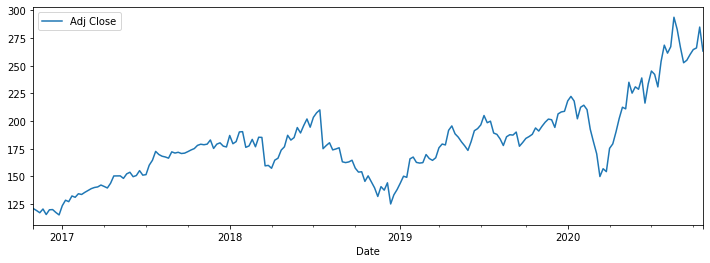

In [91]:
stock_data.plot(figsize=(12, 4))



```
# Convert a feature into a one-dimensional Numpy Array
y = stock_data["Adj Close"].values
y
```



In [92]:
y = stock_data["Adj Close"].values
y

array([120.75    , 119.019997, 117.019997, 120.379997, 115.400002,
       119.68    , 119.870003, 117.269997, 115.050003, 123.410004,
       128.339996, 127.040001, 132.179993, 130.979996, 134.190002,
       133.529999, 135.440002, 137.169998, 138.789993, 139.839996,
       140.339996, 142.050003, 140.779999, 139.389999, 143.679993,
       150.25    , 150.240005, 150.330002, 148.059998, 152.130005,
       153.610001, 149.600006, 150.639999, 155.070007, 150.979996,
       151.440002, 159.970001, 164.429993, 172.449997, 169.619995,
       168.080002, 167.410004, 166.320007, 172.020004, 170.949997,
       171.639999, 170.539993, 170.869995, 172.229996, 173.740005,
       174.979996, 177.880005, 178.919998, 178.460007, 179.      ,
       182.779999, 175.100006, 179.      , 180.179993, 177.199997,
       176.460007, 186.850006, 179.369995, 181.289993, 190.      ,
       190.279999, 176.110001, 177.360001, 183.289993, 176.619995,
       185.229996, 185.089996, 159.389999, 159.789993, 157.199



```
# Normalization: 
from sklearn.preprocessing import MinMaxScaler
```



In [93]:
from sklearn.preprocessing import MinMaxScaler



```
# Converts a one-dimensional Numpy Array to a two-dimensional Numpy Array
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
y
```



In [94]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
y

array([[-0.93617382],
       [-0.95554567],
       [-0.97794083],
       [-0.94031696],
       [-0.99608086],
       [-0.94815523],
       [-0.94602766],
       [-0.97514144],
       [-1.        ],
       [-0.90638821],
       [-0.85118422],
       [-0.86574102],
       [-0.80818554],
       [-0.82162261],
       [-0.78567831],
       [-0.79306874],
       [-0.77168133],
       [-0.75230956],
       [-0.73416953],
       [-0.72241204],
       [-0.71681325],
       [-0.69766531],
       [-0.71188628],
       [-0.72745092],
       [-0.67941336],
       [-0.60584517],
       [-0.60595709],
       [-0.60494934],
       [-0.6303679 ],
       [-0.58479366],
       [-0.56822129],
       [-0.61312353],
       [-0.60147813],
       [-0.55187275],
       [-0.59767098],
       [-0.59252003],
       [-0.49700467],
       [-0.44706355],
       [-0.3572589 ],
       [-0.38894808],
       [-0.40619228],
       [-0.41369463],
       [-0.42589996],
       [-0.36207378],
       [-0.37405527],
       [-0



```
# Convert a two-dimensional Numpy Array to a one-dimensional Pytorch Tensor
y = torch.FloatTensor(y).view(-1)
y
```



In [95]:
y = torch.FloatTensor(y).view(-1)
y

tensor([-0.9362, -0.9555, -0.9779, -0.9403, -0.9961, -0.9482, -0.9460, -0.9751,
        -1.0000, -0.9064, -0.8512, -0.8657, -0.8082, -0.8216, -0.7857, -0.7931,
        -0.7717, -0.7523, -0.7342, -0.7224, -0.7168, -0.6977, -0.7119, -0.7275,
        -0.6794, -0.6058, -0.6060, -0.6049, -0.6304, -0.5848, -0.5682, -0.6131,
        -0.6015, -0.5519, -0.5977, -0.5925, -0.4970, -0.4471, -0.3573, -0.3889,
        -0.4062, -0.4137, -0.4259, -0.3621, -0.3741, -0.3663, -0.3786, -0.3750,
        -0.3597, -0.3428, -0.3289, -0.2965, -0.2848, -0.2900, -0.2839, -0.2416,
        -0.3276, -0.2839, -0.2707, -0.3041, -0.3124, -0.1960, -0.2798, -0.2583,
        -0.1607, -0.1576, -0.3163, -0.3023, -0.2359, -0.3106, -0.2142, -0.2157,
        -0.5035, -0.4990, -0.5280, -0.4461, -0.4263, -0.3445, -0.3107, -0.1944,
        -0.2427, -0.2176, -0.1161, -0.1708, -0.0952, -0.0293, -0.1124, -0.0126,
         0.0332,  0.0625, -0.3299, -0.2976, -0.2698, -0.3421, -0.3326, -0.3205,
        -0.4626, -0.4707, -0.4639, -0.44



```
# Separate normalized data for training and testing
test_size = 24

train_seq = y[:-test_size]
test_seq = y[-test_size:]
```



In [96]:
# test_size = 24
test_size = 12


# train_seq = y[:-test_size]
# test_seq = y[-test_size:]



```
# Plot y, train_seq and test_seq
plt.figure(figsize=(12, 4))
plt.xlim(-20, len(y)+20)
plt.grid(True)
plt.plot(y)
```



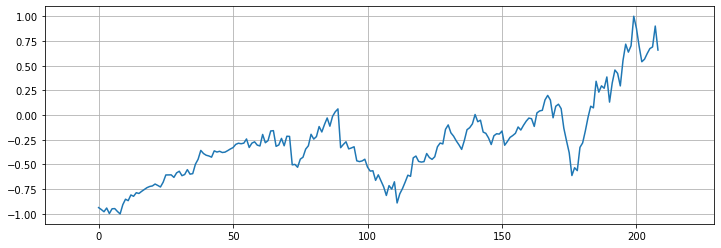

In [97]:
plt.figure(figsize=(12, 4))
plt.xlim(-20, len(y)+20)
plt.grid(True)
plt.plot(y)



```
train_window_size = 12
```



In [98]:
train_window_size = 12



```
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out
```



In [99]:
def input_data(seq, ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out



```
train_data = input_data(train_seq, train_window_size)
```



In [100]:
# train_data = input_data(train_seq, train_window_size)
train_data = input_data(y, train_window_size)



```
print("The Number of Training Data: ", len(train_data))
```



In [101]:
# 600-24-12=564
print("The Nunber of Training Data: ", len(train_data))

The Nunber of Training Data:  197




```
class Model(nn.Module):

    
    def __init__(self, input=1, h=50, output=1):
        
        super().__init__()
        self.hidden_size = h
        
        self.lstm = nn.LSTM(input, h)
        self.fc = nn.Linear(h, output)

        self.hidden = (
            torch.zeros(1, 1, h),
            torch.zeros(1, 1, h)
        )
        
        
    def forward(self, seq):
        
        out, _ = self.lstm(
            seq.view(len(seq), 1, -1),
            self.hidden
        )

        out = self.fc(
            out.view(len(seq), -1)
        )
        
        return out[-1]
```



In [102]:
class Model(nn.Module):


    def __init__(self, input=1, h=50, output=1):
        super().__init__()
        self.hidden_size = h

        self.lstm = nn.LSTM(input, h)
        self.fc = nn.Linear(h, output)

        self.hidden = (
            torch.zeros(1, 1, h),
            torch.zeros(1, 1, h)
        )
    

    def forward(self, seq):

        out, _ = self.lstm(
            seq.view(len(seq), 1, -1),
            self.hidden
        )

        out = self.fc(
            out.view(len(seq), -1)
        )

        return out[-1]



```
torch.manual_seed(123)
model = Model()
# mean squared error loss　平均二乗誤差損失
criterion = nn.MSELoss()
# stochastic gradient descent 確率的勾配降下
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```



In [103]:
torch.manual_seed(123)
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



```
epochs = 10
train_losses = []
test_losses = []
```



In [104]:
# epochs = 10
epochs = 50

train_losses = []
test_losses = []



```
def run_train():
    model.train()
    
    for train_window, correct_label in train_data:

        optimizer.zero_grad()
 
        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)           
        )
 
        train_predicted_label = model.forward(train_window)
        train_loss = criterion(train_predicted_label, correct_label)
 
        train_loss.backward()
        optimizer.step()
 
        train_losses.append(train_loss)
```



In [105]:
def run_train():
    model.train()

    for train_window, correct_label in train_data:

        optimizer.zero_grad()

        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)
        )

        train_predicted_label = model.forward(train_window)
        train_loss = criterion(train_predicted_label, correct_label)

        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)



```
# Extract the value of an element from a one-dimensional Tensor with a single element
a = torch.tensor([3])
a
# a.item()
```



In [106]:
a = torch.tensor([3])
a.item()

3



```
def run_test():
    model.eval()
    
    for i in range(test_size):
 
        test_window = torch.FloatTensor(extending_seq[-test_size:])
 
 
        # print()
        # print("The Length of Extending Sequence: ", len(extending_seq))
        # print("The Length of window", len(test_window))
        # print()
 

        # Stop storing parameters by not computing the slope, so as not to consume memory
        with torch.no_grad():
 
            model.hidden = (
                torch.zeros(1, 1, model.hidden_size),
                torch.zeros(1, 1, model.hidden_size)           
            )
 
            test_predicted_label = model.forward(test_window)
            extending_seq.append(test_predicted_label.item())
    
    test_loss = criterion(
        torch.FloatTensor(extending_seq[-test_size:]),
        y[len(y)-test_size:]
    )
 
    test_losses.append(test_loss)
```



In [107]:
def run_test():
    model.eval()

    for i in range(test_size):

        test_window = torch.FloatTensor(extending_seq[-test_size:])

        with torch.no_grad():

            model.hidden = (
                torch.zeros(1, 1, model.hidden_size),
                torch.zeros(1, 1, model.hidden_size)
            )  
        
            test_predicted_label = model.forward(test_window)
            extending_seq.append(test_predicted_label.item())
    
    test_loss = criterion(
        torch.FloatTensor(extending_seq[-test_size:]),
        y[len(y)-test_size:]
    )

    test_losses.append(test_loss)



```
train_seq[-test_size:]
```



In [108]:
# train_seq[-test_size:]



```
train_seq[-test_size:].tolist()
```



In [109]:
# train_seq[-test_size:].tolist()



```
for epoch in range(epochs):

    print()
    print(f'Epoch: {epoch+1}')

    run_train()

    extending_seq = train_seq[-test_size:].tolist()
    
    run_test()

    plt.figure(figsize=(12, 4))
    plt.xlim(-20, len(y)+20)
    plt.grid(True)

    plt.plot(y.numpy())
    
    plt.plot(
        range(len(y)-test_size, len(y)),
        extending_seq[-test_size:]
    )
    
    plt.show()
```




Epoch: 1


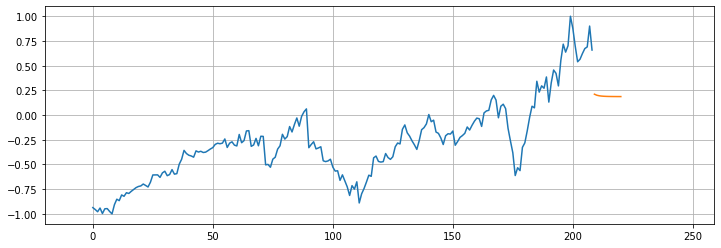


Epoch: 2


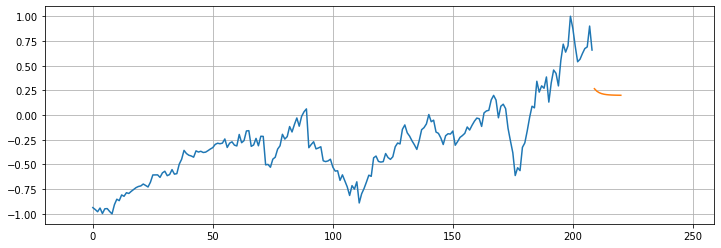


Epoch: 3


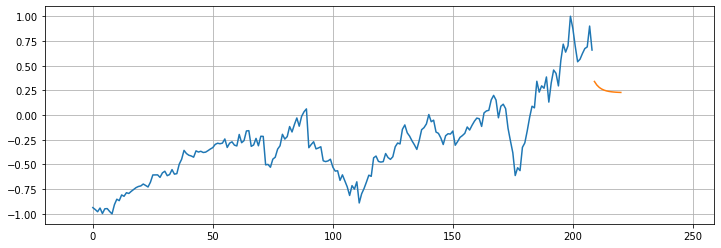


Epoch: 4


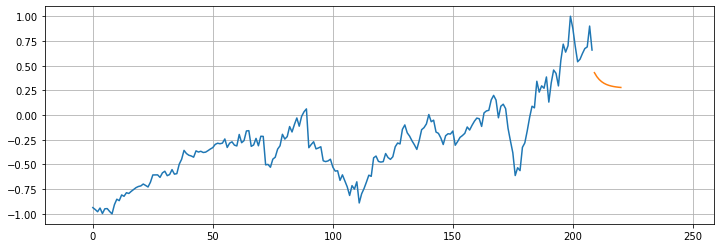


Epoch: 5


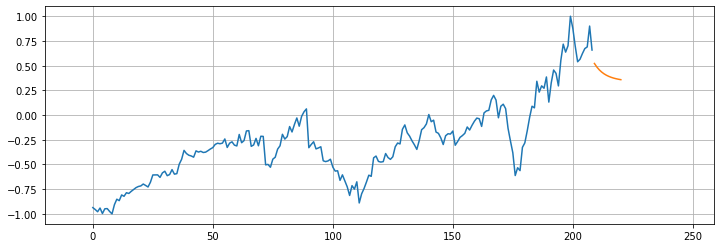


Epoch: 6


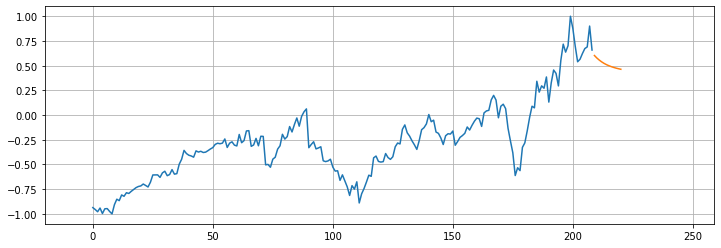


Epoch: 7


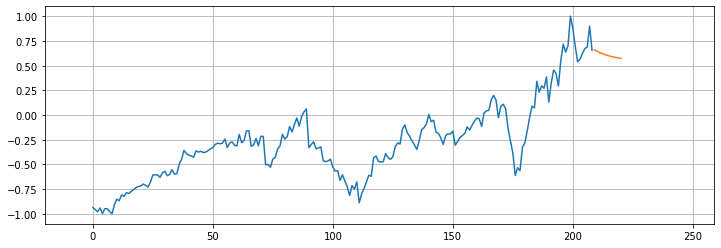


Epoch: 8


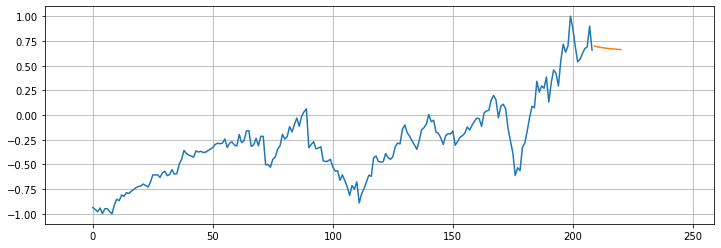


Epoch: 9


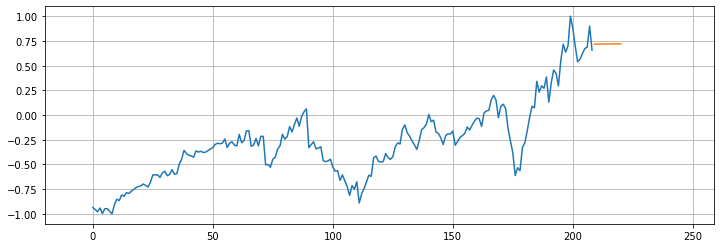


Epoch: 10


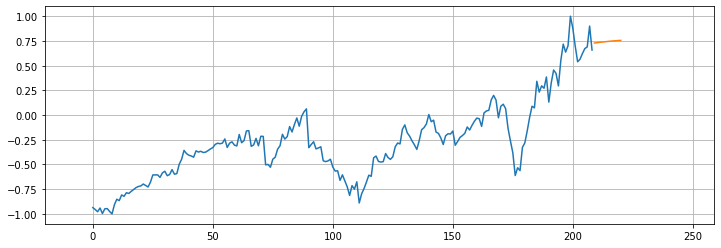


Epoch: 11


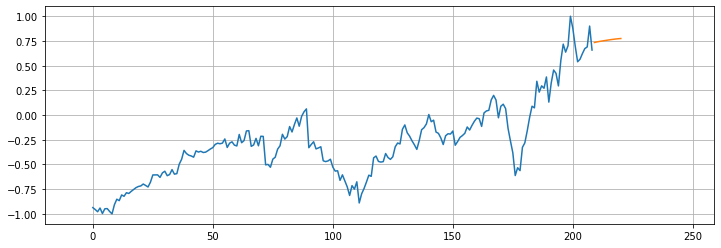


Epoch: 12


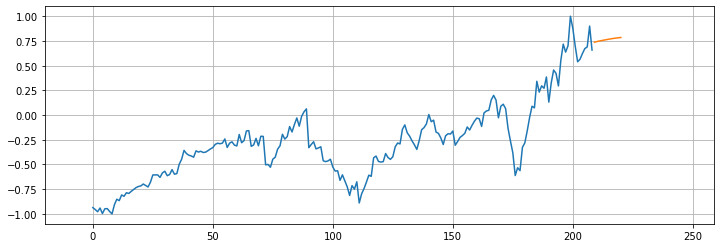


Epoch: 13


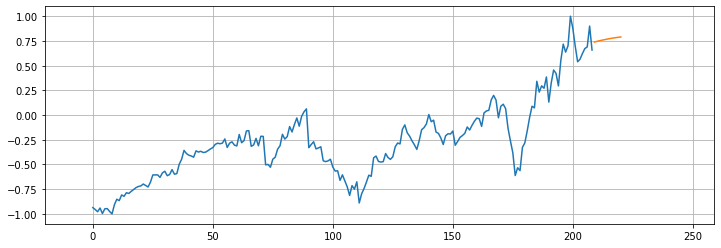


Epoch: 14


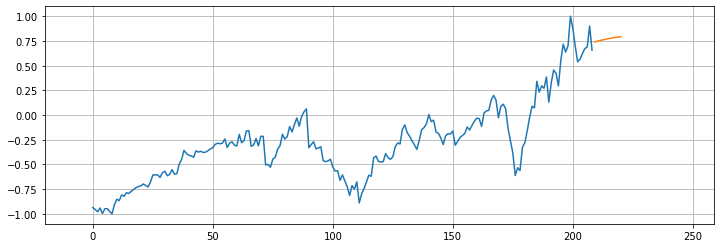


Epoch: 15


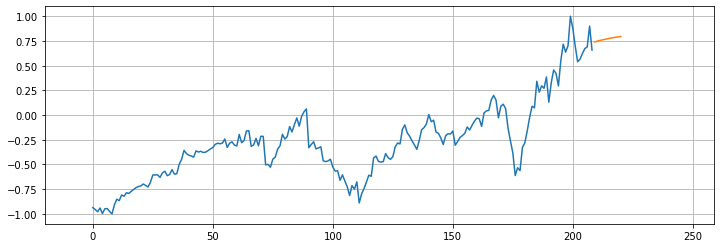


Epoch: 16


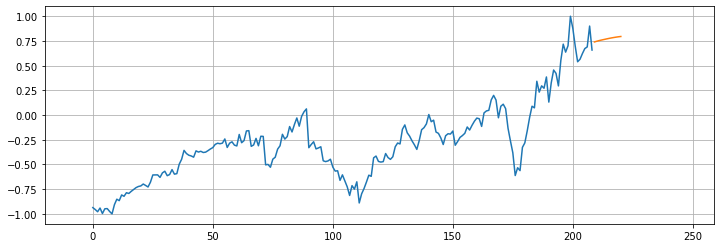


Epoch: 17


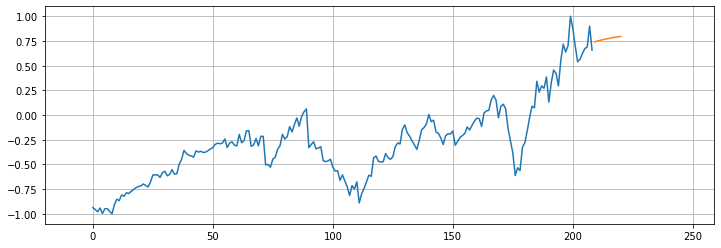


Epoch: 18


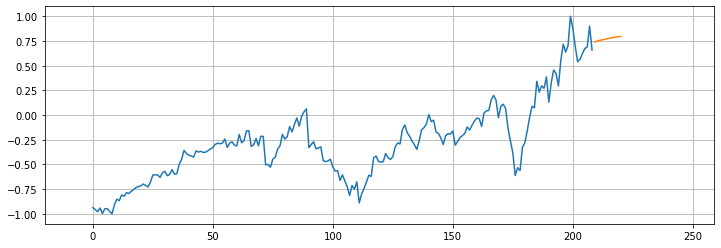


Epoch: 19


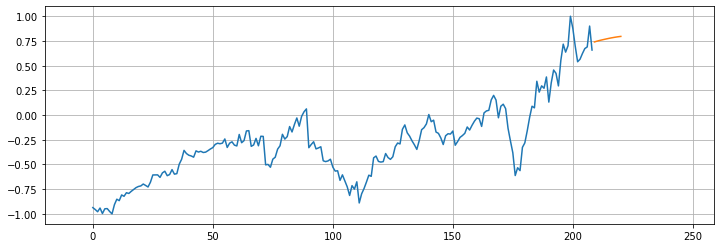


Epoch: 20


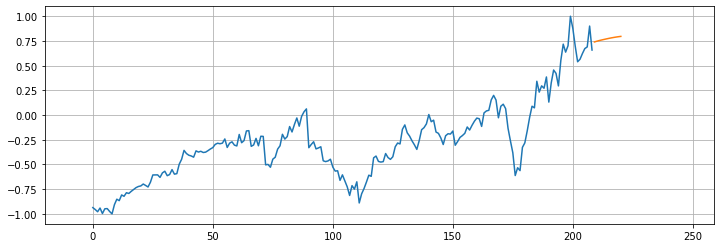


Epoch: 21


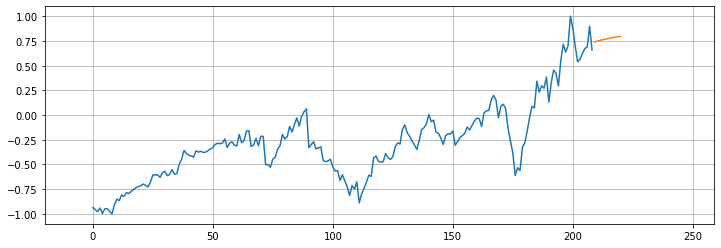


Epoch: 22


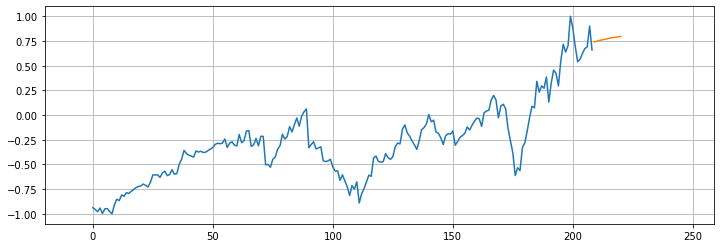


Epoch: 23


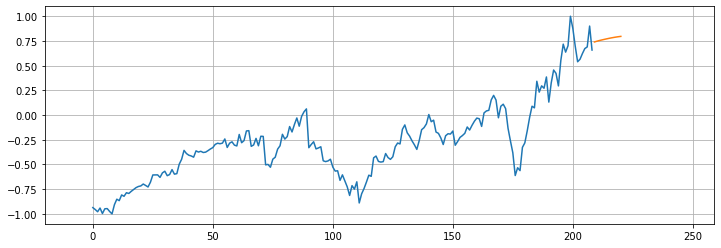


Epoch: 24


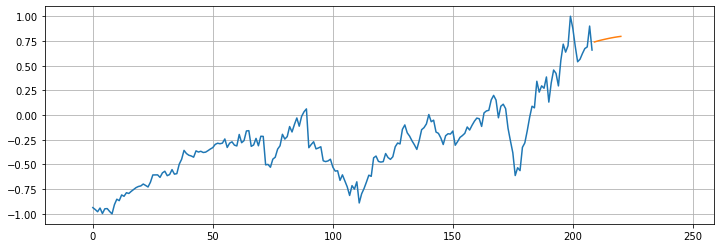


Epoch: 25


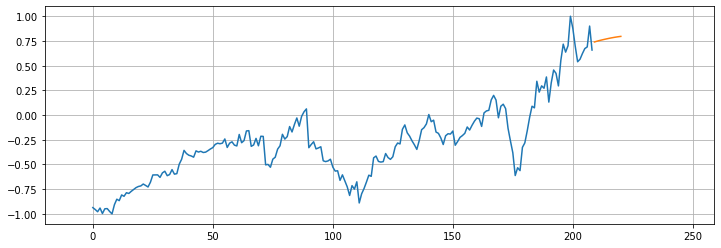


Epoch: 26


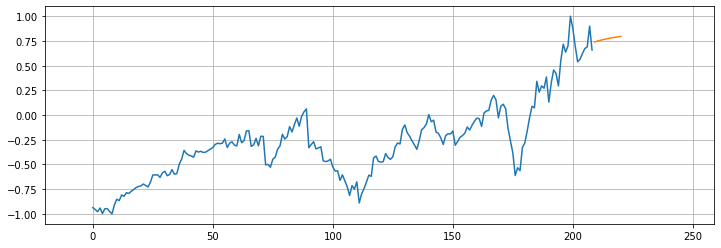


Epoch: 27


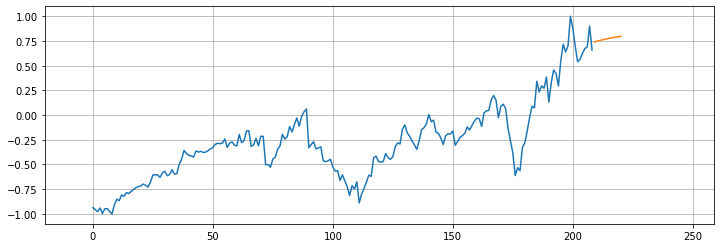


Epoch: 28


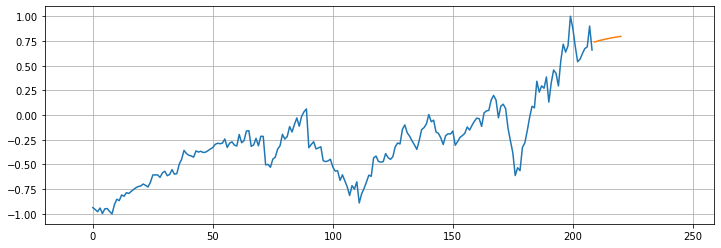


Epoch: 29


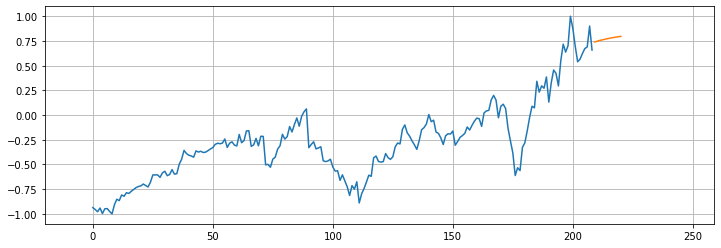


Epoch: 30


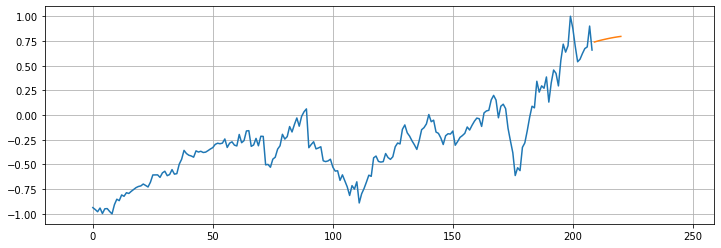


Epoch: 31


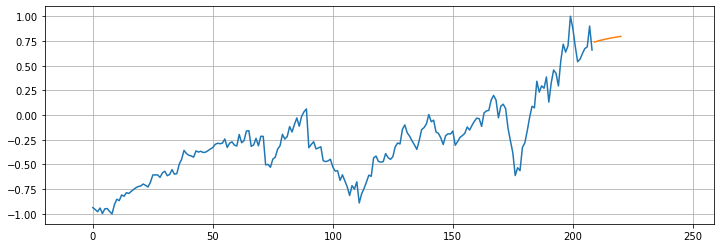


Epoch: 32


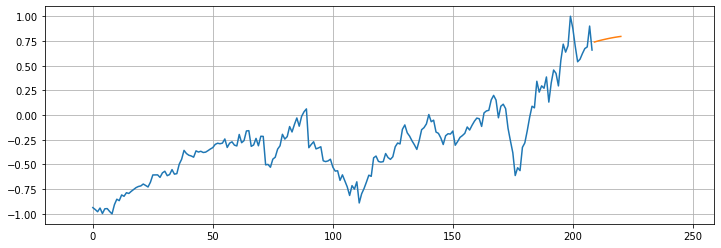


Epoch: 33


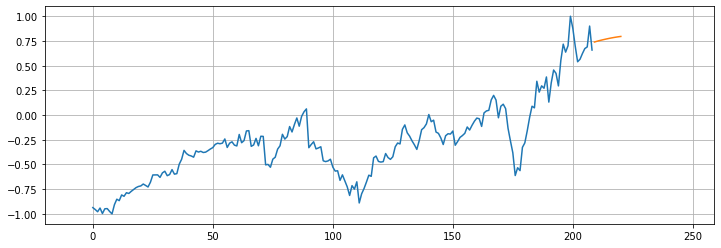


Epoch: 34


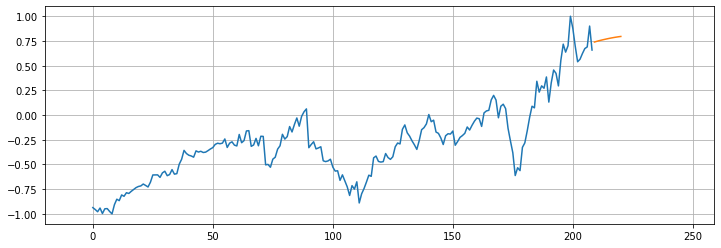


Epoch: 35


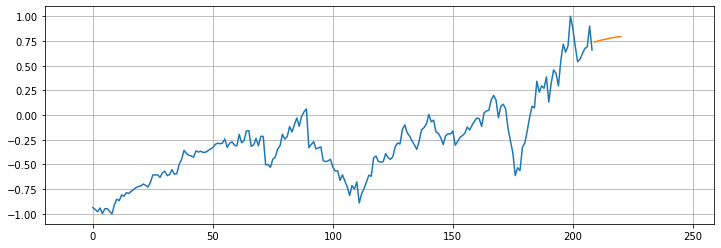


Epoch: 36


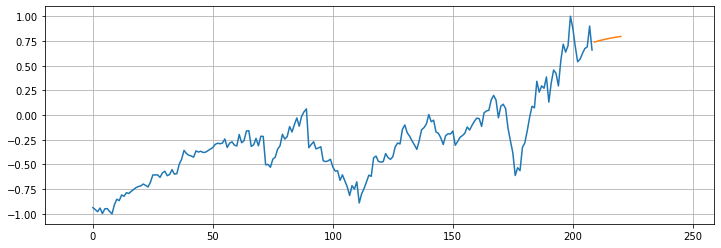


Epoch: 37


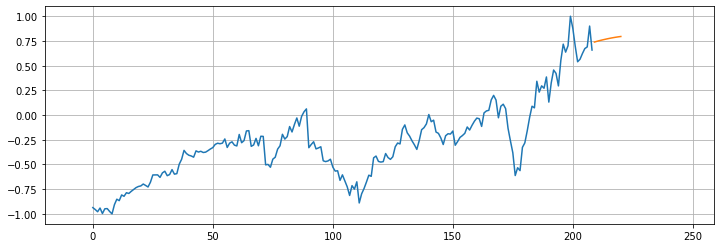


Epoch: 38


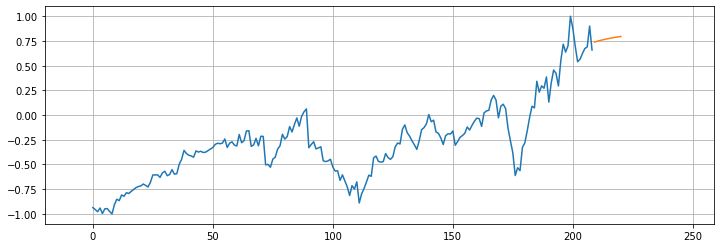


Epoch: 39


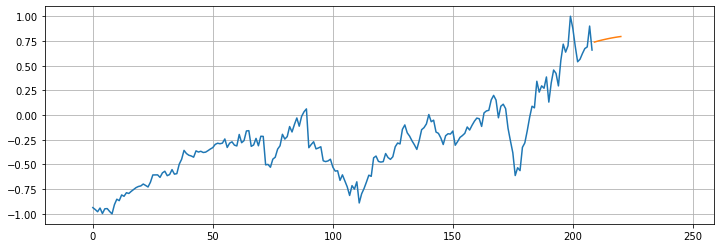


Epoch: 40


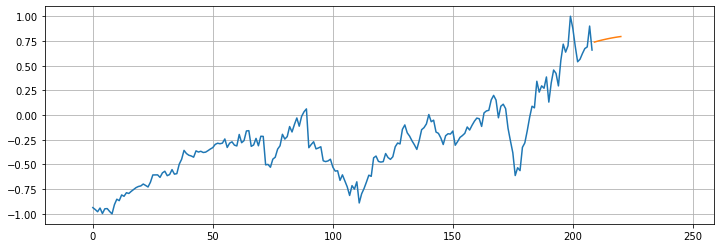


Epoch: 41


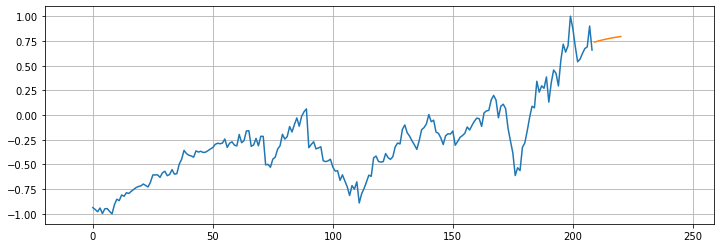


Epoch: 42


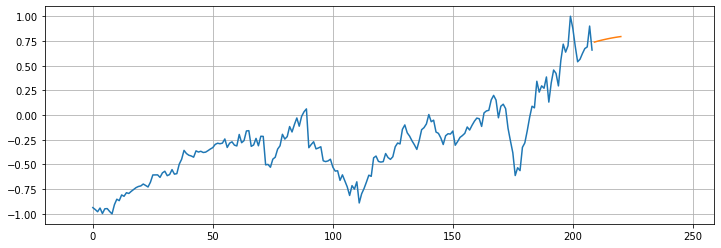


Epoch: 43


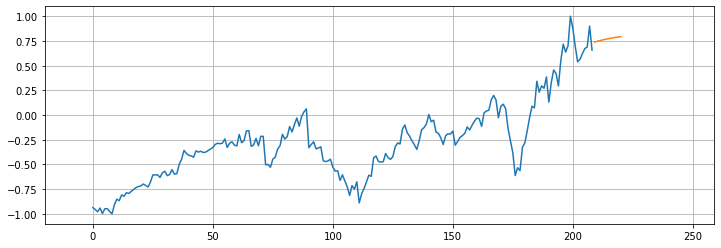


Epoch: 44


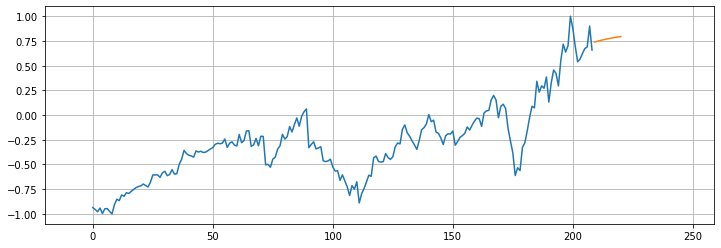


Epoch: 45


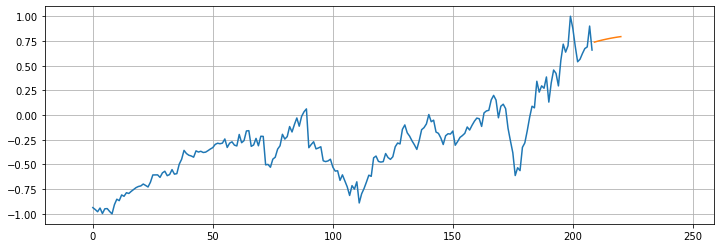


Epoch: 46


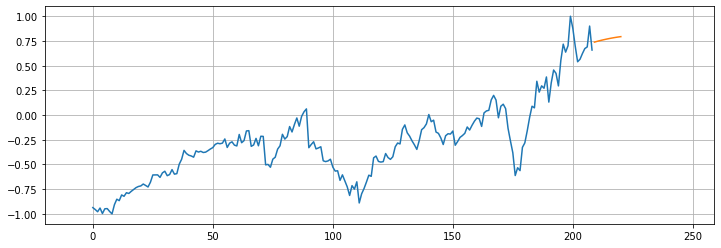


Epoch: 47


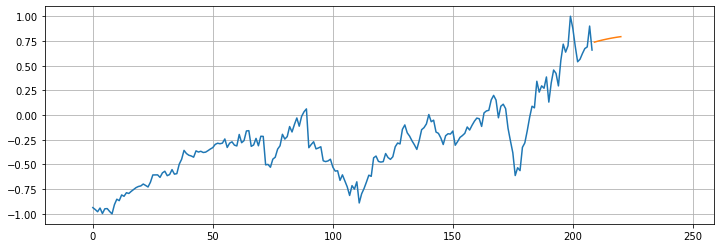


Epoch: 48


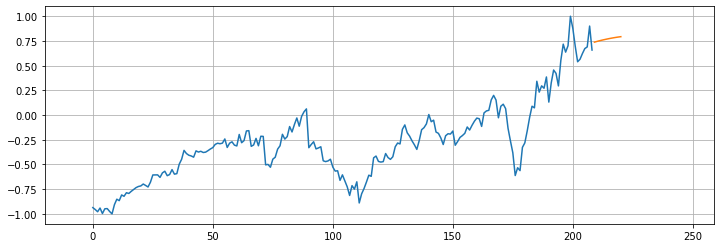


Epoch: 49


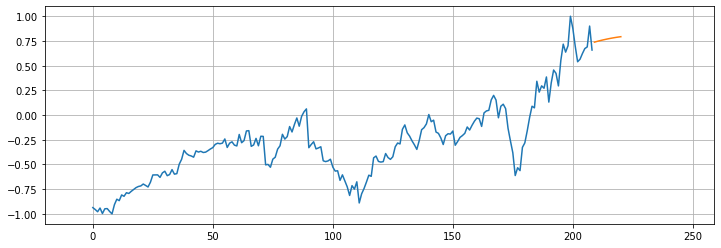


Epoch: 50


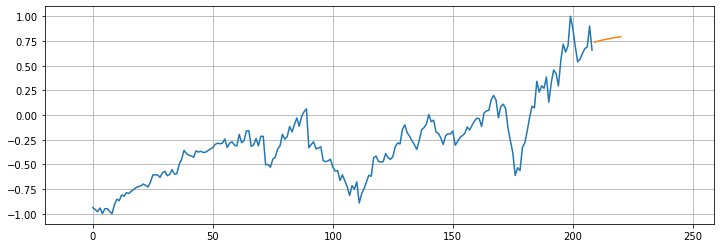

In [110]:
for epoch in range(epochs):

    print()
    print(f'Epoch: {epoch+1}')

    run_train()

    # extending_seq = train_seq[-test_size:].tolist()
    extending_seq = y[-test_size:].tolist()

    run_test()

    plt.figure(figsize=(12, 4))
    # plt.xlim(-20, len(y)+20)
    plt.xlim(-20, len(y)+50)
    plt.grid(True)

    plt.plot(y.numpy())

    plt.plot(
        # range(len(y)-test_size, len(y)),
        range(len(y), len(y)+test_size),
        extending_seq[-test_size:]
    )

    plt.show()



```
plt.plot(train_losses)
```



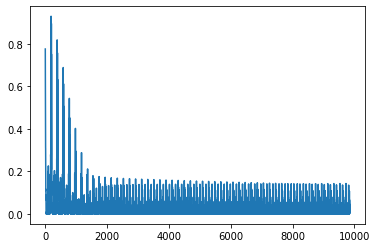

In [111]:
plt.plot(train_losses)



```
plt.plot(test_losses)
```



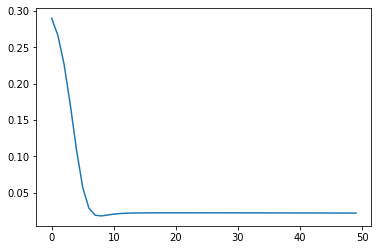

In [112]:
plt.plot(test_losses)



```
# List
predicted_normalized_labels_list  = extending_seq[-test_size:]
predicted_normalized_labels_list
```



In [113]:
predicted_normalized_labels_list = extending_seq[-test_size:]



```
# Convert a list to a one-dimensional Numpy Array
predicted_normalized_labels_array_1d = np.array(predicted_normalized_labels_list)
predicted_normalized_labels_array_1d
```



In [114]:
predicted_normalized_labels_array_1d = np.array(predicted_normalized_labels_list)
predicted_normalized_labels_array_1d

array([0.7376653 , 0.74461973, 0.75108504, 0.7569524 , 0.76249361,
       0.76777089, 0.77279294, 0.77746308, 0.78177893, 0.78576291,
       0.78945506, 0.79275727])



```
# Converts a one-dimensional Numpy Array to a two-dimensional Numpy Array
predicted_normalized_labels_array_2d = predicted_normalized_labels_array_1d.reshape(-1, 1)
predicted_normalized_labels_array_2d
```



In [115]:
predicted_normalized_labels_array_2d = predicted_normalized_labels_array_1d.reshape(-1, 1)
predicted_normalized_labels_array_2d

array([[0.7376653 ],
       [0.74461973],
       [0.75108504],
       [0.7569524 ],
       [0.76249361],
       [0.76777089],
       [0.77279294],
       [0.77746308],
       [0.78177893],
       [0.78576291],
       [0.78945506],
       [0.79275727]])



```
# From a normalized number to a true number.
predicted_labels_array_2d = scaler.inverse_transform(predicted_normalized_labels_array_2d)
predicted_labels_array_2d
```



In [116]:
predicted_labels_array_2d = scaler.inverse_transform(predicted_normalized_labels_array_2d)
predicted_labels_array_2d

# predicted_labels_array_2d_nintendo = predicted_labels_array_2d
# predicted_labels_array_2d_sony = predicted_labels_array_2d

# predicted_labels_array_2d_apple = predicted_labels_array_2d
# predicted_labels_array_2d_google = predicted_labels_array_2d
# predicted_labels_array_2d_amazon = predicted_labels_array_2d
predicted_labels_array_2d_facebook = predicted_labels_array_2d



```
len(predicted_labels_array_2d)
```



In [117]:
len(predicted_labels_array_2d)

12



```
stock_data["Adj Close"][-test_size:]
```



In [118]:
stock_data["Adj Close"][-test_size:]

Date
2020-08-10    261.239990
2020-08-17    267.010010
2020-08-24    293.660004
2020-08-31    282.730011
2020-09-07    266.609985
2020-09-14    252.529999
2020-09-21    254.820007
2020-09-28    259.940002
2020-10-05    264.450012
2020-10-12    265.929993
2020-10-19    284.790009
2020-10-26    263.109985
Name: Adj Close, dtype: float64



```
len(stock_data["Adj Close"][-test_size:])
```



In [119]:
len(stock_data["Adj Close"][-test_size:])

12



```
stock_data.index
```



In [120]:
stock_data.index

DatetimeIndex(['2016-10-31', '2016-11-07', '2016-11-14', '2016-11-21',
               '2016-11-28', '2016-12-05', '2016-12-12', '2016-12-19',
               '2016-12-26', '2017-01-02',
               ...
               '2020-08-24', '2020-08-31', '2020-09-07', '2020-09-14',
               '2020-09-21', '2020-09-28', '2020-10-05', '2020-10-12',
               '2020-10-19', '2020-10-26'],
              dtype='datetime64[ns]', name='Date', length=209, freq=None)



```
# Either way of writing works.
x_2018_10_to_2020_09 = np.arange('2018-10', '2020-10', dtype='datetime64[M]')
# x_2018_10_to_2020_09 = np.arange('2018-10-01', '2020-10-31', dtype='datetime64[M]')

x_2018_10_to_2020_09
```



In [121]:
# x_2018_10_to_2020_09 = np.arange('2018-10', '2020-10', dtype='datetime64[M]')
# x_2018_10_to_2020_09

# x_2020_10_to_2022_09 = np.arange('2020-10', '2022-10', dtype='datetime64[M]')
# x_2020_10_to_2022_09

# x_2020_10_to_2021_09 = np.arange('2020-10', '2021-10', dtype='datetime64[M]')
# x_2020_10_to_2021_09

x_2020_11_to_2021_01_weekly = np.arange('2020-11-10', '2021-02-01', dtype='datetime64[W]')
x_2020_11_to_2021_01_weekly

array(['2020-11-05', '2020-11-12', '2020-11-19', '2020-11-26',
       '2020-12-03', '2020-12-10', '2020-12-17', '2020-12-24',
       '2020-12-31', '2021-01-07', '2021-01-14', '2021-01-21'],
      dtype='datetime64[W]')



```
len(x_2018_10_to_2020_09)
```



In [122]:
# len(x_2018_10_to_2020_09)
# len(x_2020_10_to_2022_09)
# len(x_2020_10_to_2021_09)
len(x_2020_11_to_2021_01_weekly)

12



```
fig = plt.figure(figsize=(12, 4))
plt.title('Stock Price Prediction')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
fig.autofmt_xdate()

plt.plot(stock_data["Adj Close"]['2016-01':])
plt.plot(x_2018_10_to_2020_09, predicted_labels_array_2d)
plt.show()
```



In [123]:
# fig = plt.figure(figsize=(12, 4))
# plt.title('Stock Price Prediction')
# plt.ylabel('Price')
# plt.grid(True)
# plt.autoscale(axis='x', tight=True)
# fig.autofmt_xdate()

# plt.plot(stock_data["Adj Close"]['2016-01':])
# # plt.plot(x_2018_10_to_2020_09, predicted_labels_array_2d)
# # plt.plot(x_2020_10_to_2022_09, predicted_labels_array_2d)
# plt.plot(x_2020_10_to_2021_09, predicted_labels_array_2d)
# plt.show()

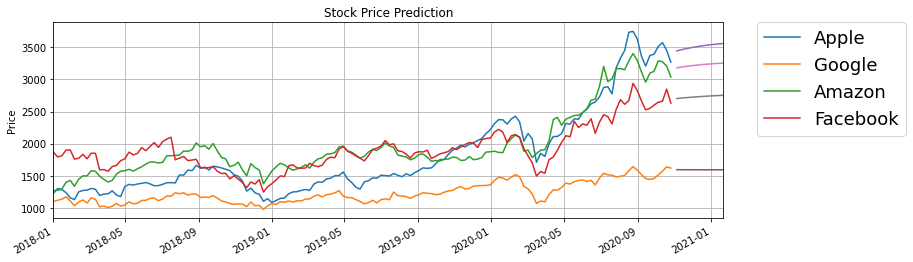

In [132]:
fig = plt.figure(figsize=(12, 4))
plt.title('Stock Price Prediction')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
fig.autofmt_xdate()

# plt.plot(stock_data["Adj Close"]['2016-01':])
# plt.plot(stock_data_nintendo["Adj Close"]['2016-01':], label="Nintendo")
# plt.plot(stock_data_sony["Adj Close"]['2016-01':], label ="Sony")

plt.plot(stock_data_apple["Adj Close"]['2018-01':]*30, label="Apple")
plt.plot(stock_data_google["Adj Close"]['2018-01':], label ="Google")
plt.plot(stock_data_amazon["Adj Close"]['2018-01':], label="Amazon")
plt.plot(stock_data_facebook["Adj Close"]['2018-01':]*10, label ="Facebook")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=18)

# plt.plot(x_2020_10_to_2021_09, predicted_labels_array_2d)
# plt.plot(x_2020_10_to_2021_09, predicted_labels_array_2d_nintendo)
# plt.plot(x_2020_10_to_2021_09, predicted_labels_array_2d_sony)

plt.plot(x_2020_11_to_2021_01_weekly, predicted_labels_array_2d_apple*30)
plt.plot(x_2020_11_to_2021_01_weekly, predicted_labels_array_2d_google)
plt.plot(x_2020_11_to_2021_01_weekly, predicted_labels_array_2d_amazon)
plt.plot(x_2020_11_to_2021_01_weekly, predicted_labels_array_2d_facebook*10)

plt.show()